In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

from solve_hand_to_mouth import *
from solve_consumption_saving import *
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [2]:
value_function_employment_HTM(model.par, model.par.w, 30 )

7.639058002197418

In [3]:
value_function_employment_ConSav(model.par, model.sol)
print(np.shape(model.par.V_e_t_a))



(44, 10)


In [4]:
model.par.V_e_t_a[30,0]

5.760030990675467

In [5]:
unemployed_ss_HTM(model.par,0)

(0.2774718760113472, -91.7576326101833)

In [6]:
s, V_u = unemployment_ss_ConSav(model.par, -1, 0, 0)
print(V_u, s)

-93.96698792943772 0.2932626345979287


In [7]:
search_effort_HTM = solve_search_effort_HTM(model.par)
print(np.shape(search_effort_HTM))


(2, 44)


In [8]:
solve_search_and_consumption_ConSav(model.par, model.sol)
search_effort_ConSav = model.sol.s[0,:,:]
search_effort_ConSav = search_effort_ConSav.T
print(np.shape(search_effort_ConSav))

(10, 44)


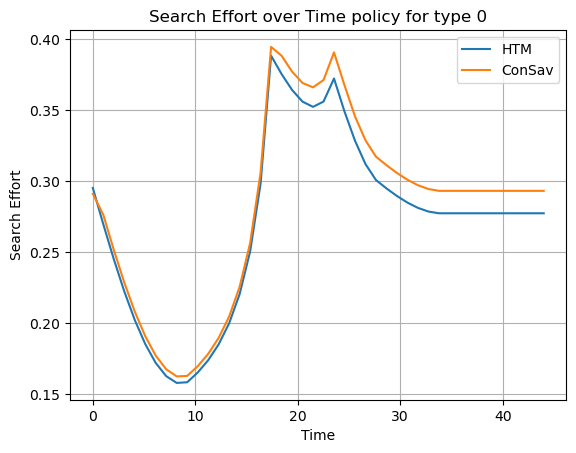

In [9]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort_HTM[0,:], label = 'HTM') 
plt.plot(time, search_effort_ConSav[0,:], label = 'ConSav') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time policy for type 0')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
sim_HTM = model.solve_HTM()

In [11]:
sim_ConSav = model.solve_ConSav()


In [12]:
model.par.model = 'Mixed'
sim_mixed = model.solve()

Text(0.5, 1.0, 'Search Effort over simulated for all types')

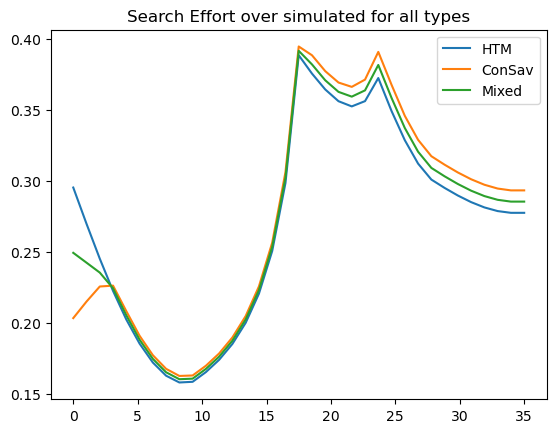

In [13]:
t_sim = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(t_sim, sim_HTM[:], label = 'HTM')
plt.plot(t_sim, sim_ConSav[:], label = 'ConSav')
plt.plot(t_sim, sim_mixed[:], label = 'Mixed')
plt.legend()
plt.title('Search Effort over simulated for all types')